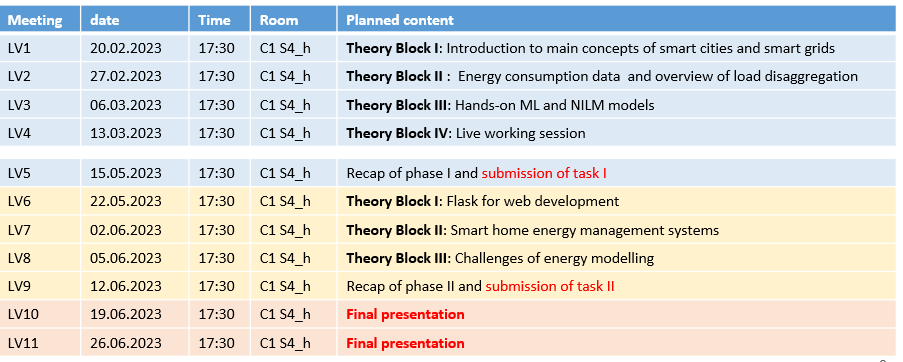

In [2]:
from IPython.display import Image
Image(filename='embedded_images/deadlines.png')

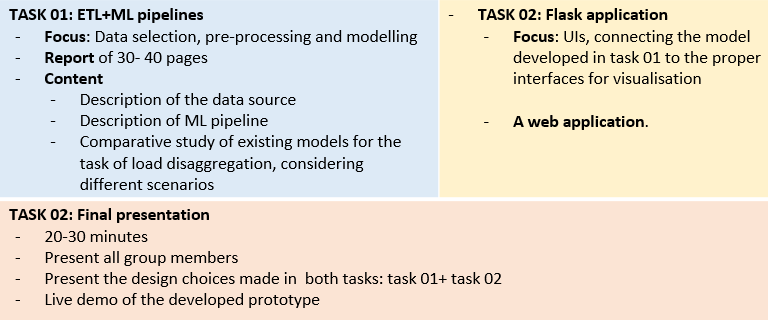

In [3]:
Image(filename='embedded_images/task_overview.png')

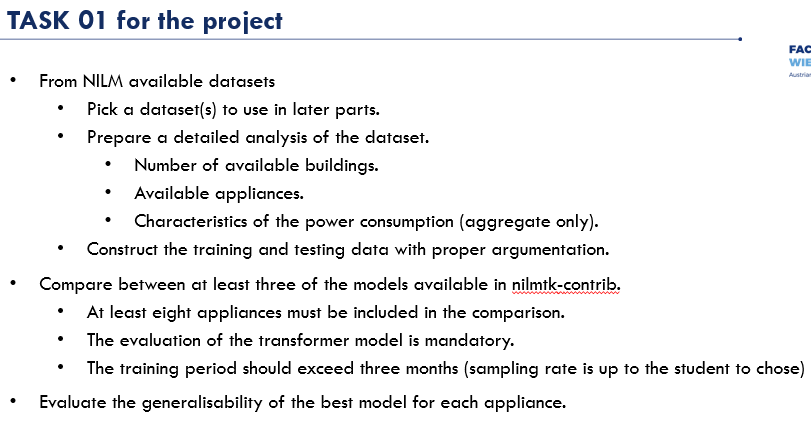

In [4]:
Image(filename='embedded_images/task_01.png')

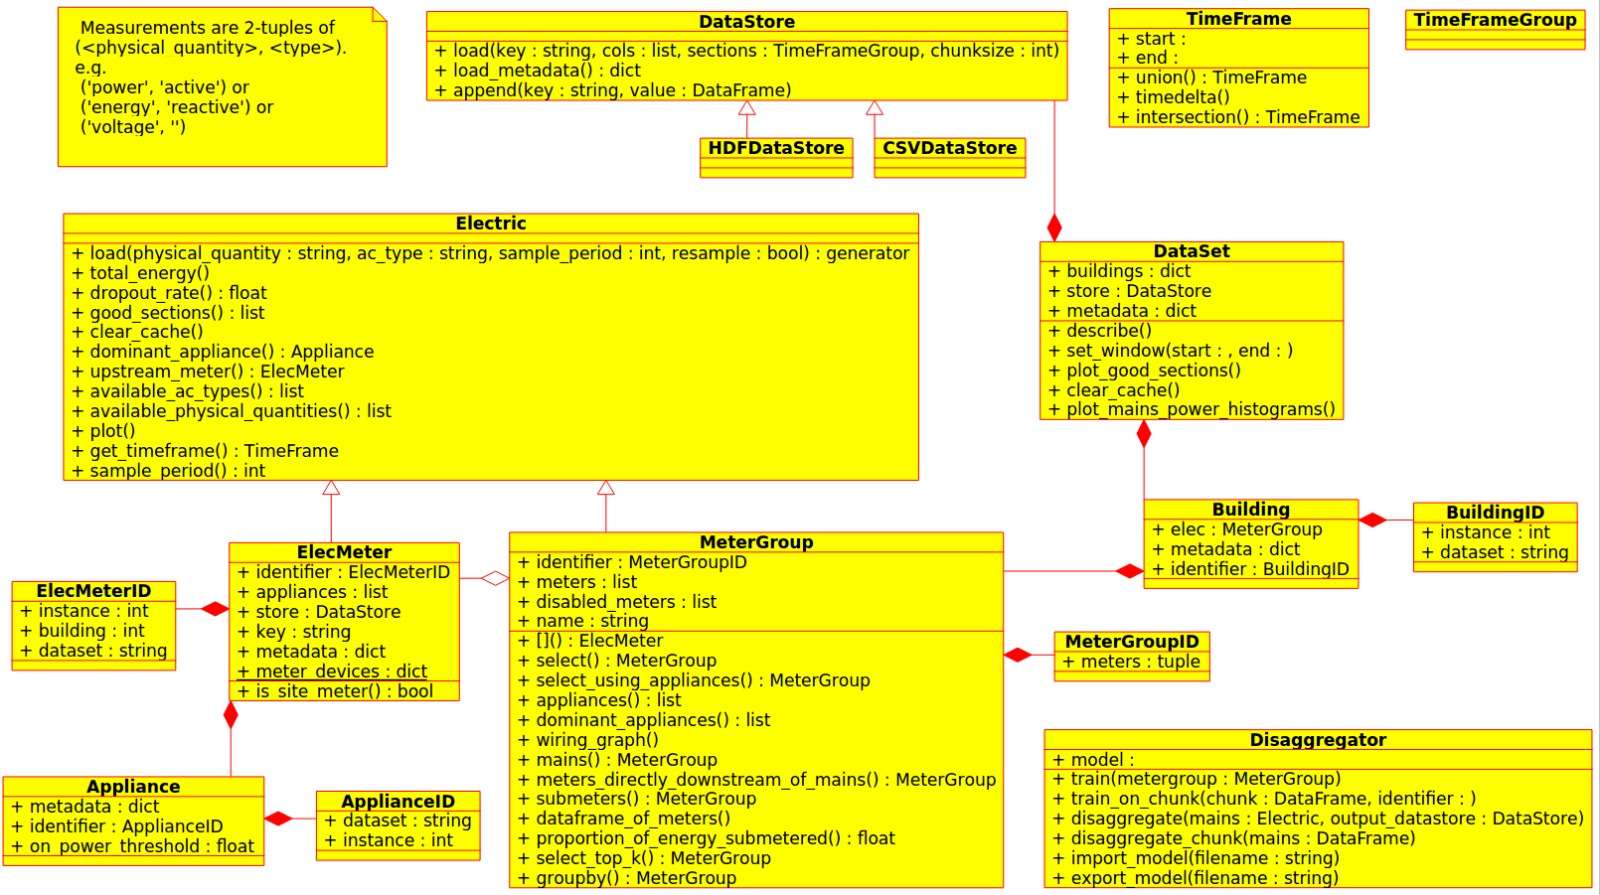

In [5]:
Image(filename='embedded_images/dataset_structure.jpeg')

In [6]:
# IDEAS
# check other datasets than ukdale for common appliances
# process data in year to year bases -> otherwise pc RIP, not enough RAM

# QEUSTIONS
# why some elecMeters multiple appliances? ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
# multiple instances of appliances

In [5]:
# Load Dataset
from nilmtk import DataSet

ukdale = DataSet("ukdale2.h5")
#{'start': '2012-11-09T22:28:15+00:00', 'end': '2017-04-26T18:35:53+01:00'}
ukdale.set_window(start='2015-01-01', end='2016-01-01')

In [6]:
# Get all appliances out of all buildings
arr = []

for j in range(len(ukdale.buildings)):
    arr2 = []
    for i in range(len(ukdale.buildings[j+1].elec.appliances)):
        arr2.append(ukdale.buildings[1].elec.appliances[i].type["type"])
    arr.append(arr2)
print(arr)

[['tablet computer charger', 'printer', 'radio', 'solar thermal pumping station', 'light', 'light', 'light', 'washer dryer', 'light', 'light', 'mobile phone charger', 'HTPC', 'laptop computer', 'audio system', 'computer monitor', 'clothes iron', 'coffee maker', 'fan', 'toasted sandwich maker', 'boiler', 'kettle', 'food processor', 'television', 'vacuum cleaner', 'radio', 'light', 'audio amplifier', 'washer dryer', 'microwave', 'kitchen aid', 'light', 'light', 'mobile phone charger', 'baby monitor', 'light', 'fridge freezer', 'charger', 'dish washer', 'light', 'audio system', 'desktop computer', 'drill', 'oven', 'broadband router', 'laptop computer', 'wireless phone charger', 'immersion heater', 'food processor', 'USB hub', 'soldering iron', 'toaster', 'radio', 'light', 'hair straighteners', 'external hard disk', 'light', 'light', 'breadmaker', 'light', 'light', 'computer', 'baby monitor', 'light', 'water pump', 'broadband router', 'laptop computer', 'active subwoofer', 'fan', 'ethernet

In [7]:
# buildings: 1, 2, 5 with common appliances -> 3, 4 not enough appliances
common_apps = set(arr[0]).intersection(arr[1], arr[4])
print(common_apps)

{'tablet computer charger', 'light', 'laptop computer', 'HTPC', 'audio system', 'computer monitor', 'mobile phone charger', 'printer', 'washer dryer', 'coffee maker', 'clothes iron', 'radio', 'fan', 'solar thermal pumping station'}


In [8]:
# Get all ElectricMeters
ukdale.buildings[1].elec

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances

In [15]:
#Get microwave data -> target time series
df_microwave =next(ukdale.buildings[1].elec["microwave"].load(sample_period=10))
print(df_microwave)

physical_quantity          power
type                      active
2015-01-01 00:00:00+00:00    1.0
2015-01-01 00:00:10+00:00    1.0
2015-01-01 00:00:20+00:00    1.0
2015-01-01 00:00:30+00:00    1.0
2015-01-01 00:00:40+00:00    1.0
...                          ...
2015-12-31 23:59:10+00:00    1.0
2015-12-31 23:59:20+00:00    1.0
2015-12-31 23:59:30+00:00    1.0
2015-12-31 23:59:40+00:00    1.0
2015-12-31 23:59:50+00:00    1.0

[3153600 rows x 1 columns]


In [10]:
#Get aggregate of building -> feature time series
df_aggregate =next(ukdale.buildings[1].elec.mains().load(sample_period=10))
print(df_aggregate)

C:\Users\david\.conda\envs\case-study\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")


physical_quantity               power     voltage       power
type                         apparent                  active
2015-01-01 00:00:00+00:00  191.406006  244.472992  139.268997
2015-01-01 00:00:10+00:00  191.656998  244.311996  139.268005
2015-01-01 00:00:20+00:00  191.382004  244.304993  139.240997
2015-01-01 00:00:30+00:00  191.270996  244.242996  139.207993
2015-01-01 00:00:40+00:00  191.417999  244.315002  139.272995
...                               ...         ...         ...
2015-12-31 23:59:10+00:00  349.593994  243.177002  332.893005
2015-12-31 23:59:20+00:00  349.404999  243.151001  332.700989
2015-12-31 23:59:30+00:00  349.821991  243.253006  333.083984
2015-12-31 23:59:40+00:00  349.696991  243.399002  332.979980
2015-12-31 23:59:50+00:00  349.717010  243.470993  333.084991

[3153600 rows x 3 columns]


In [24]:
len(df)

13770430

In [12]:
df["type"]

KeyError: 'type'

In [ ]:
df.isna().sum().sum()/len(df)*100

In [ ]:
df =next(ukdale.buildings[1].elec.mains().load(sample_period=10))
df

In [ ]:
#PREPROCESSING
